## Dropout : A simple way to Prevent Neural Networks from Overfitting


In this notebook, we experiment with dropouts on MNIST data set.

MNIST dataset is available with Keras. It consists of 28 x 28 pixel handwritten digit images.


In [1]:
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape {}".format(x_train.shape))
print("y_train shape {}".format(y_train.shape))
print("x_test shape {}".format(x_test.shape))
print("x_train shape {}".format(y_test.shape))



Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
x_train shape (10000,)


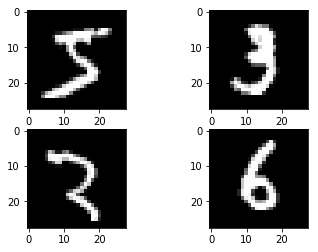

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(221)
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[10], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[500], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[1020], cmap = plt.get_cmap('gray'))
plt.show()

In [10]:
from keras.utils import np_utils

## One hot encoder
train_one_hot =  np_utils.to_categorical(y_train)
test_one_hot  = np_utils.to_categorical(y_test)

print("train one hot shapec {}".format(train_one_hot.shape))

train one hot shapec (60000, 10)


In [2]:
input_dim = x_train.shape[1:]
input_dim

(28, 28)

In [13]:
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.models import Model 

# Code up the network
x_input = Input(input_dim)
x = Flatten()(x_input)
x = Dense(512, activation='relu', name ="dense1")(x)
x = Dense(512, activation='relu', name = "dense2")(x)
predictions = Dense(10, activation='softmax')(x)

# Create and train model
model = Model(inputs = x_input, outputs = predictions)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, train_one_hot)


Epoch 1/1
60000/60000 [==============================] - 7s 120us/step - loss: 14.5286 - acc: 0.0986
